In [1]:
import pandas as pd
import numpy as np

In [2]:
def get_data():
    all_data = []
    for i in range(10,23):
        year = str(2000+i)
        url1 = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/'+year+'/all?type=daily_treasury_yield_curve&field_tdr_date_value='+year+'page&_format=csv'
        
        data = pd.read_csv(url1)
        all_data.append(data)
    pd_alldata = pd.concat(all_data,ignore_index=True)
    pd_alldata['Date'] = pd.to_datetime(pd_alldata['Date'])
    pd_alldata.index = pd_alldata['Date']
    
    req_cols = ['3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', 
                '7 Yr','10 Yr', '20 Yr', '30 Yr']
    final = pd_alldata[req_cols]
    return final

In [33]:
df = get_data()
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2010-12-31,0.12,0.19,0.29,0.61,1.02,2.01,2.71,3.30,4.13,4.34
2010-12-30,0.12,0.20,0.29,0.66,1.07,2.06,2.76,3.38,4.21,4.43
2010-12-29,0.13,0.20,0.30,0.64,1.05,2.03,2.75,3.35,4.19,4.41
2010-12-28,0.15,0.21,0.31,0.75,1.17,2.18,2.89,3.50,4.33,4.53
2010-12-27,0.17,0.22,0.32,0.71,1.11,2.08,2.76,3.36,4.20,4.42


In [34]:
df.to_csv('uts_2022.csv')

In [36]:
df = pd.read_csv('uts_2022.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2010-12-31,0.12,0.19,0.29,0.61,1.02,2.01,2.71,3.30,4.13,4.34
2010-12-30,0.12,0.20,0.29,0.66,1.07,2.06,2.76,3.38,4.21,4.43
2010-12-29,0.13,0.20,0.30,0.64,1.05,2.03,2.75,3.35,4.19,4.41
2010-12-28,0.15,0.21,0.31,0.75,1.17,2.18,2.89,3.50,4.33,4.53
2010-12-27,0.17,0.22,0.32,0.71,1.11,2.08,2.76,3.36,4.20,4.42


In [37]:
df = df.sort_values(by='Date')
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2010-01-04,0.08,0.18,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65
2010-01-05,0.07,0.17,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59
2010-01-06,0.06,0.15,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70
2010-01-07,0.05,0.16,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69
2010-01-08,0.05,0.15,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70


In [48]:
df=df.diff()

In [49]:
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.01,-0.01,-0.04,-0.08,-0.09,-0.09,-0.08,-0.08,-0.06,-0.06
2010-01-06,-0.01,-0.02,-0.01,0.00,0.03,0.04,0.05,0.08,0.09,0.11
2010-01-07,-0.01,0.01,0.00,0.02,0.02,0.02,0.00,0.00,-0.01,-0.01
2010-01-08,0.00,-0.01,-0.03,-0.07,-0.06,-0.05,-0.02,-0.02,-0.01,0.01


In [50]:
df=df.dropna()
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2010-01-05,-0.01,-0.01,-0.04,-0.08,-0.09,-0.09,-0.08,-0.08,-0.06,-0.06
2010-01-06,-0.01,-0.02,-0.01,0.00,0.03,0.04,0.05,0.08,0.09,0.11
2010-01-07,-0.01,0.01,0.00,0.02,0.02,0.02,0.00,0.00,-0.01,-0.01
2010-01-08,0.00,-0.01,-0.03,-0.07,-0.06,-0.05,-0.02,-0.02,-0.01,0.01
2010-01-11,-0.01,-0.02,-0.02,-0.01,-0.01,0.01,0.01,0.02,0.03,0.04


In [51]:
cov_mat = np.cov(df.values.T)
cov_mat

array([[0.0005608 , 0.00036563, 0.00028307, 0.00025636, 0.00026403,
        0.00024271, 0.0002308 , 0.00021986, 0.00019804, 0.00018557],
       [0.00036563, 0.00050146, 0.00039507, 0.00040622, 0.00041754,
        0.00040899, 0.00039116, 0.000357  , 0.00030749, 0.00028436],
       [0.00028307, 0.00039507, 0.00068707, 0.00069589, 0.00073955,
        0.00073509, 0.00070317, 0.00062599, 0.00051286, 0.00047661],
       [0.00025636, 0.00040622, 0.00069589, 0.00134739, 0.00142381,
        0.00152786, 0.00148867, 0.00133673, 0.00113027, 0.00103868],
       [0.00026403, 0.00041754, 0.00073955, 0.00142381, 0.00178756,
        0.00196158, 0.00196007, 0.00178596, 0.00154365, 0.00142512],
       [0.00024271, 0.00040899, 0.00073509, 0.00152786, 0.00196158,
        0.00245349, 0.00252777, 0.00237129, 0.00214258, 0.00200153],
       [0.0002308 , 0.00039116, 0.00070317, 0.00148867, 0.00196007,
        0.00252777, 0.0027687 , 0.00264711, 0.00247944, 0.00234548],
       [0.00021986, 0.000357  , 0.0006259

In [52]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [53]:
eig_vals.shape

(10,)

In [54]:
eig_vals

array([1.47178180e-02, 1.83443233e-03, 8.08915823e-04, 2.90760214e-04,
       1.81738341e-04, 1.25757115e-04, 8.46530006e-05, 3.22870660e-05,
       4.94955193e-05, 4.32324791e-05])

In [55]:
idx_ranking = np.argsort(eig_vals)[::-1]
idx_ranking

array([0, 1, 2, 3, 4, 5, 6, 8, 9, 7])

In [56]:
eig_vals = eig_vals[idx_ranking]
eig_vecs = eig_vecs[idx_ranking]

In [57]:
top_3_pcs = eig_vecs[:3]


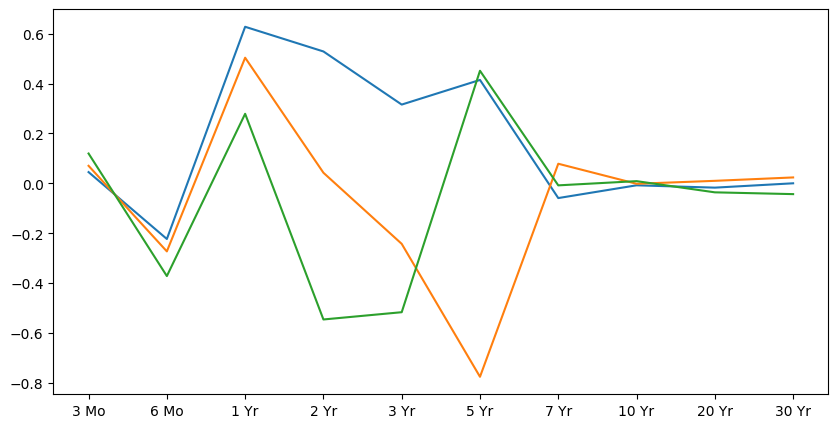

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.columns, eig_vecs[0])
ax.plot(df.columns, eig_vecs[1])
ax.plot(df.columns, eig_vecs[2])
plt.show()